In [18]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import autograd

In [19]:
def f(x,y):
    return np.exp(-x**2-y**2)

def g(x,y):
    return np.exp(-(x-1)**2-(y-1)**2)

def h(x,y):
    return 2*(f(x,y)-g(x,y))

In [20]:
def find_seed(g,inf,sup,c=0,eps=2**(-26)):
    if (g(inf)-c)*(g(sup)-c)>0:
        return None
    else:
        deb=inf
        fin=sup
        m=(deb+fin)/2
        if g(inf)>=g(sup):
            dec=True
        else :
            dec=False
        while np.abs((g(m)-c))>eps:
            if g(m)>c:
                if dec:
                    deb=m
                else:
                    fin=m
            elif g(m)<c:
                if dec:
                    fin=m
                else:
                    deb=m
            m=(deb+fin)/2
        return m

In [21]:
def F(x,y,centre_cercle,f,c,delta):
    return(f(x,y)-c,(x-centre_cercle[0])**2+(y-centre_cercle[1])**2-delta**2)

In [22]:
def newton(point_init,centre_cercle,f,c,delta,eps=2**(-26)):
    point=point_init
    valeur_F=F(point_init[0],point_init[1],centre_cercle,f,c,delta)
    while valeur_F[0]>eps and valeur_F[1]>eps:
        J_inv=np.linalg.inv(Jacob(F,point[0],point[1]))
        point=point-np.dot(J_inv,F(point[0],point[1],centre_cercle,f,c,delta))
        valeur_F=F(point[0],point[1],centre_cercle,f,c,delta)
    return point

In [23]:
def simple_contour(f,absinf,abssup,ordinf,ordsup,arete,c=0,delta=0.01,eps=2**(-26)):
    if arete=="gauche":
        x=[absinf]
        def g(t):
            return f(absinf,t)
        y=[find_seed(g,ordinf,ordsup,c)]
        i=0
        if y==[None]:
            return [],[]
    elif arete=='droite':
        x=[abssup]
        def g(t):
            return f(abssup,t)
        y=[find_seed(g,ordinf,ordsup,c)]
        i=0
        if y==[None]:
            return [],[]
    elif arete=='haut':
        def g(t):
            return f(t,ordsup)
        x=[find_seed(g,absinf,abssup,c)]
        y=[ordsup]
        i=0
        if x==[None]:
            return [],[]
    elif arete=='bas':
        def g(t):
            return f(t,ordinf)
        x=[find_seed(g,absinf,abssup,c)]
        y=[ordinf]
        i=0
        if x==[None]:
            return [],[]
    while x[i]>=absinf and x[i]<=abssup and y[i]>=ordinf and y[i]<=ordsup:
        grad=np.array([autograd.grad(f,0)(x[i],y[i]),autograd.grad(f,1)(x[i],y[i])])
        ortho=np.array([-grad[1],grad[0]])
        orthonorm=ortho/(np.sqrt(ortho[0]**2+ortho[1]**2))
        point_init=np.array([x[i],y[i]])+delta*orthonorm
        new=newton(point_init,(x[i],y[i]),f,c,delta,eps)
        x.append(new[0])
        y.append(new[1])
        i+=1
    return x,y

In [24]:

def contour(f,c=0.0,xc=[0.0,1.0],yc=[0.0,1.0],delta=0.01):
    xs=[]
    ys=[]
    for i in range(len(xc)-1):
        for j in range(len(yc)-1):
            a,b=simple_contour(f,xc[i],xc[i+1],yc[j],yc[j+1],"gauche",c,delta)
            xs.append(a)
            ys.append(b)
            a,b=simple_contour(f,xc[i],xc[i+1],yc[j],yc[j+1],"droite",c,delta)
            xs.append(a)
            ys.append(b)
            a,b=simple_contour(f,xc[i],xc[i+1],yc[j],yc[j+1],"haut",c,delta)
            xs.append(a)
            ys.append(b)
            a,b=simple_contour(f,xc[i],xc[i+1],yc[j],yc[j+1],"bas",c,delta)
            xs.append(a)
            ys.append(b)
    return xs,ys

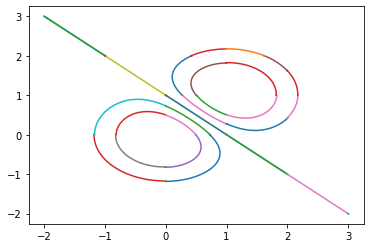

In [25]:
def tracer(h):
    for c in [-1,-0.5,0,0.5,1]:
        xs, ys=contour(h,c,[-2.,0.,1.,2.,3.],[-2.,0.,1.,2.,3.])
        for x,y in zip(xs,ys):
            plt.plot(x,y)
    plt.show()
    
tracer(h)    